# Pas bon, le fichier sauvé est corrompu il faut recommencer le decoupage

In [2]:
import sys
sys.path.insert(0,"/home/albert7a/lib/python")


## imports

import numpy as np
import dask
import xarray as xr
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import glob as glob
import matplotlib.gridspec as gridspec
from mpl_toolkits.basemap import Basemap
import time
from dask.diagnostics import ProgressBar
from datetime import date
import yaml
import io
import json
import cmocean
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import matplotlib.ticker as mticker

%matplotlib inline

/home/albert/anaconda2/lib/python2.7/site-packages/matplotlib/ticker.py:1685: UserWarning: Steps argument should be a sequence of numbers
increasing from 1 to 10, inclusive. Behavior with
values outside this range is undefined, and will
raise a ValueError in future versions of mpl.
  warnings.warn('Steps argument should be a sequence of numbers\n'


In [3]:
decoupname="/media/extra/DATA/EN4/EN4_nb_profiles_025grid.nc"
decoup=xr.open_dataset(decoupname)
lat=decoup['latitude']
lon=decoup['longitude']
nb=decoup['time_profileEN4']

In [4]:
nb.shape

(136, 356)

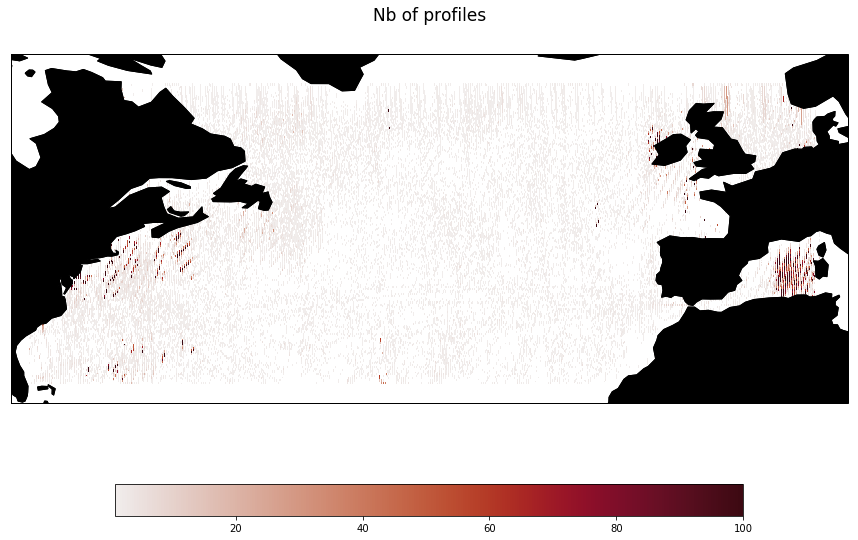

In [6]:
fig = plt.figure(figsize=(15,10))  # (w,h)
ax = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=-30))
ax.set_extent([-82, 12, 25, 55])
cmap=cmocean.cm.amp
cmap.set_under(color='white')
pcolor=ax.pcolormesh(lon,lat,nb,transform=ccrs.PlateCarree(),cmap=cmap,vmin=1,vmax=100)
ax.add_feature(cfeature.LAND,facecolor='black')
ax.coastlines()
cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=0.75)

ax.set_title('Nb of profiles',size=17,y=1.08)
plt.savefig("nb_profiles_decoupage025.png")

In [7]:
idgrand=np.where(nb>500)

In [12]:
print idgrand[0][0],idgrand[1][0]

7 135


In [13]:
nb[7,135]

<xarray.DataArray 'time_profileEN4' ()>
array(1202.0)
Attributes:
    standart_name: nb
    timeg_name: Nb of EN4 profiles
    units: 